In [30]:
import networkx as nx
import community as c
import matplotlib.pyplot as plt
import pandas as pd
import collections
import seaborn as sns
from networkx.algorithms import community

In [2]:
data = pd.read_csv("tweetsmdrlolilol.csv")
data.head()

,dest,source
0,2,3
1,4,5
2,7,8
3,7,9
4,10,11


In [3]:
G_twitter = nx.nx.from_pandas_edgelist(data.astype('int32'), 'dest', 'source', create_using = nx.Graph())

In [4]:
pos = nx.spring_layout(G_twitter) #setting layout

In [5]:
closeCent = nx.closeness_centrality(G_twitter)
degCent = nx.degree_centrality(G_twitter)
betCent = nx.betweenness_centrality(G_twitter, endpoints=True, normalized=True)

In [6]:
node_size =  [v * 1000000 for v in betCent.values()]
node_color =  [v * 20000.0 for v in closeCent.values()]

C:\Users\mateg\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-1.088724237712236,
 1.0687148988564927,
 -1.0977769042808871,
 1.0486118342239719)

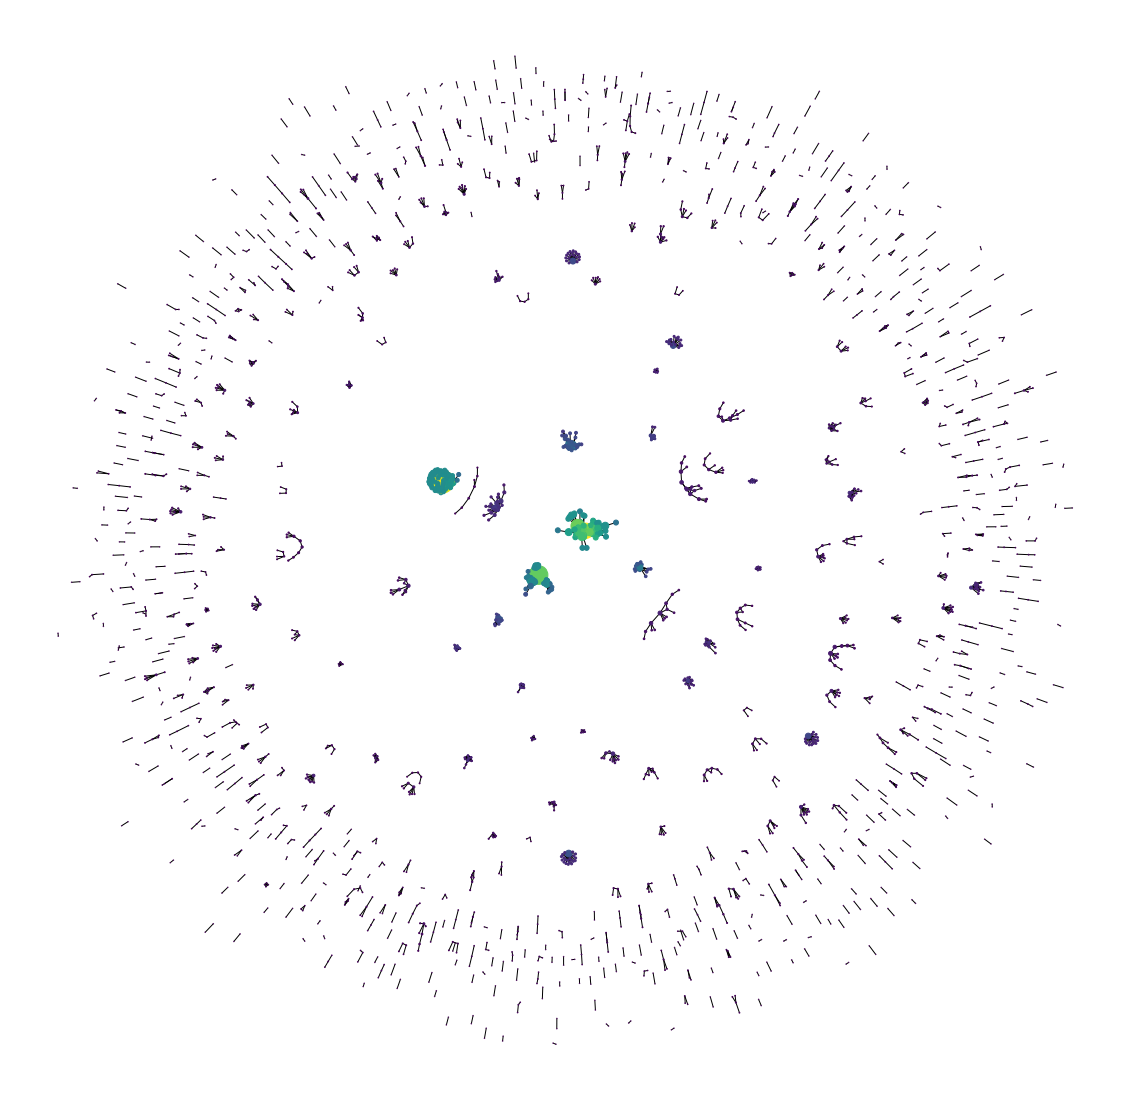

In [7]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_twitter, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [9]:
degree_sequence = sorted([d for n, d in G_twitter.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)

In [10]:
deg, cnt = zip(*degreeCount.items())
dataset_barplot = pd.DataFrame()
dataset_barplot["degrees"] = list(deg)
dataset_barplot["count"] = list(cnt)

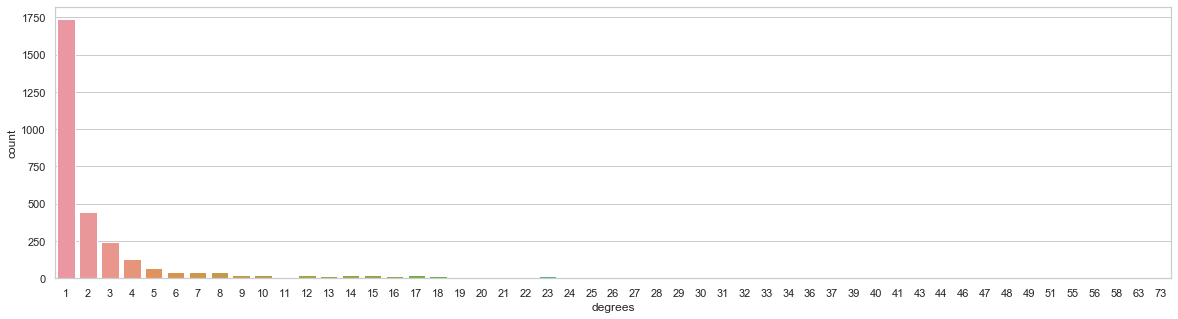

In [11]:
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.barplot(x="degrees", y="count", data=dataset_barplot)

In [12]:
degreeCount = collections.Counter(betCent.values())
deg, cnt = zip(*degreeCount.items())
dataset_barplot = pd.DataFrame()
dataset_barplot["degrees"] = list(deg)
dataset_barplot["count"] = list(cnt)

[(0, 4e-06)]

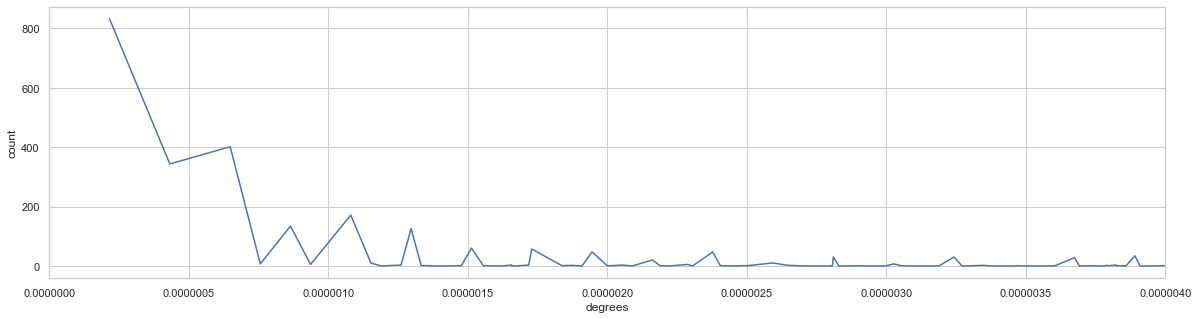

In [13]:
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.lineplot(x="degrees", y="count", data=dataset_barplot)
ax.set(xlim=(0, 0.000004))

[(0, 0.015)]

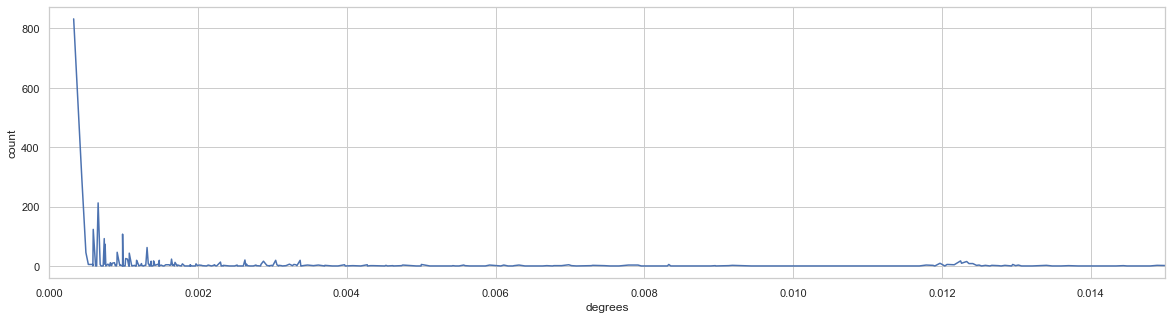

In [14]:
degreeCount = collections.Counter(closeCent.values())
deg, cnt = zip(*degreeCount.items())
dataset_barplot = pd.DataFrame()
dataset_barplot["degrees"] = list(deg)
dataset_barplot["count"] = list(cnt)
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.lineplot(x="degrees", y="count", data=dataset_barplot)
ax.set(xlim=(0, 0.015))

[(0, 0.015)]

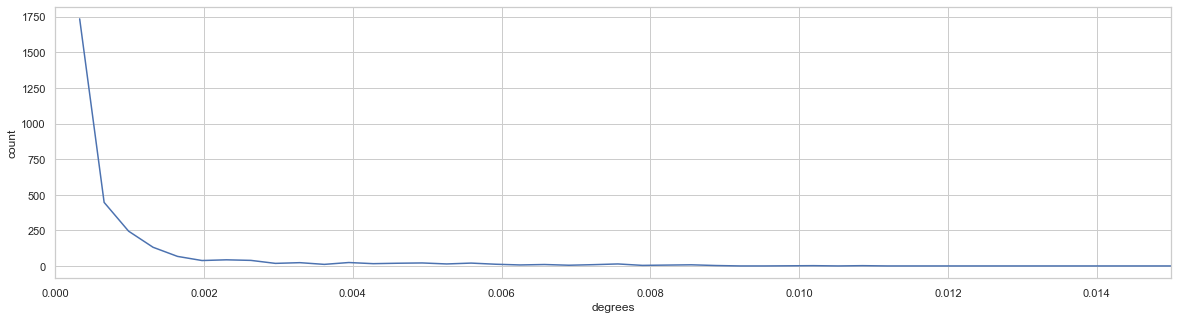

In [15]:
degreeCount = collections.Counter(degCent.values())
deg, cnt = zip(*degreeCount.items())
dataset_barplot = pd.DataFrame()
dataset_barplot["degrees"] = list(deg)
dataset_barplot["count"] = list(cnt)
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.lineplot(x="degrees", y="count", data=dataset_barplot)
ax.set(xlim=(0, 0.015))

In [18]:
data = pd.read_csv("twitter_100M.csv", sep = ",")
data.head()

,dest,source
0,1,0
1,3,2
2,2,3
3,5,4
4,4,5


In [24]:
G_twitter = nx.nx.from_pandas_edgelist(data.astype('int32'), 'source', 'dest', create_using = nx.DiGraph()).to_undirected(reciprocal=True, as_view=False)

In [25]:
pos = nx.spring_layout(G_twitter) #setting layout

In [26]:
closeCent = nx.closeness_centrality(G_twitter)
degCent = nx.degree_centrality(G_twitter)
betCent = nx.betweenness_centrality(G_twitter, endpoints=True, normalized=True)

In [55]:
node_size =  [v * 50000 for v in degCent.values()]
node_color =  [v * 20000.0 for v in betCent.values()]

C:\Users\mateg\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-1.0984852939844132,
 1.0936658412218094,
 -1.0937268048524857,
 1.099701276421547)

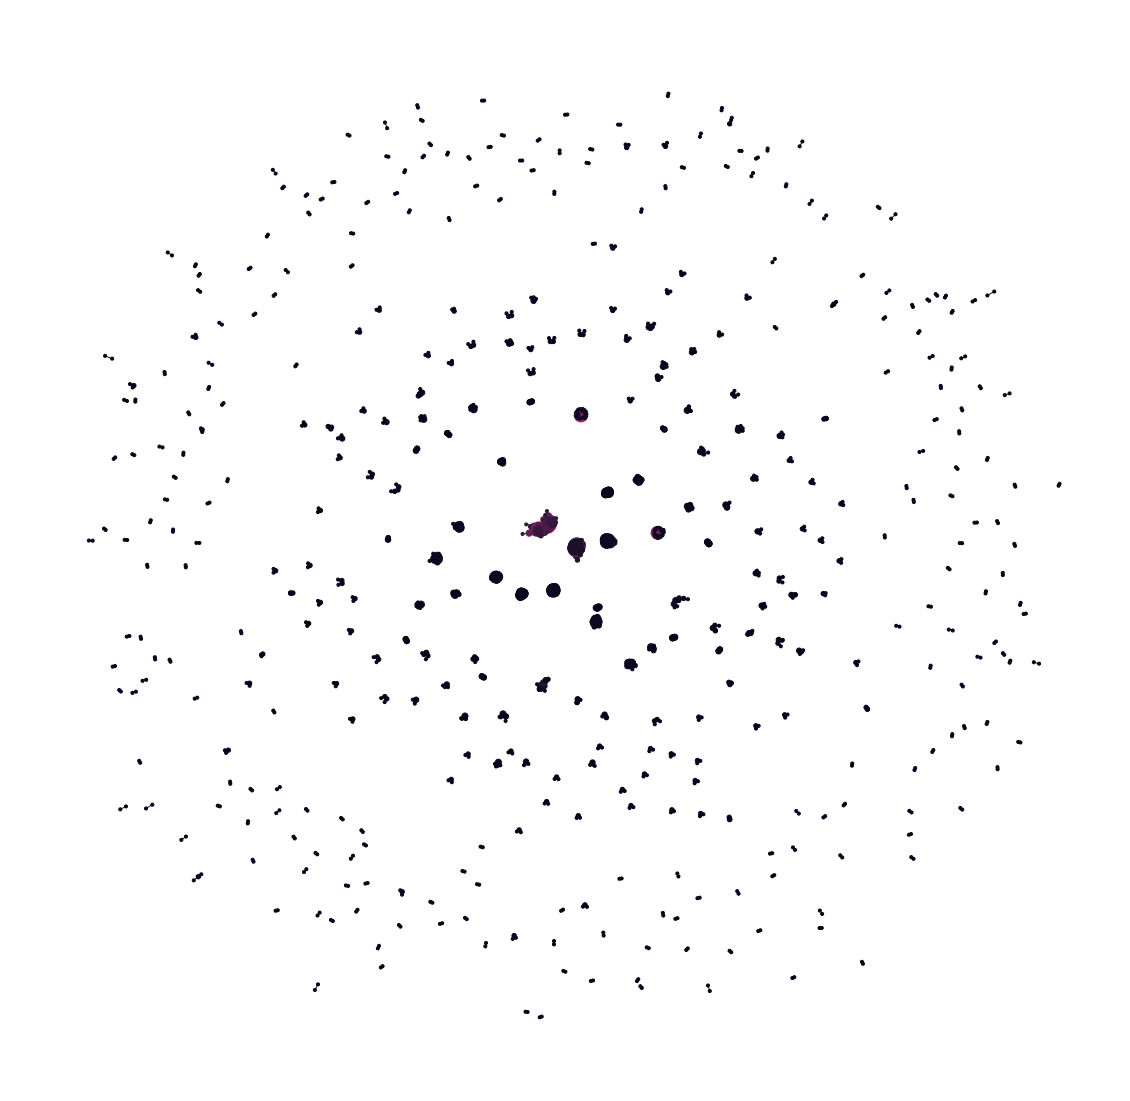

In [56]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_twitter, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [31]:
partition = community.greedy_modularity_communities(G_twitter)
print(len(partition))

4473


In [36]:
for i in range(len(partition)):
    community = list(partition[i])
    print("Communauté ",str(i+1))
    print([ G_twitter.nodes[i] for i in community ])

Communauté  1
[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
Communauté  2
[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
Communauté  3
[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
Communauté  4
[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
Communauté  5
[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
Communauté  6
[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
Communauté  7
[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
Communauté  8
[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
Communauté  9
[{}, {}, {}, {

Communauté  1047
[{}]
Communauté  1048
[{}]
Communauté  1049
[{}]
Communauté  1050
[{}]
Communauté  1051
[{}]
Communauté  1052
[{}]
Communauté  1053
[{}]
Communauté  1054
[{}]
Communauté  1055
[{}]
Communauté  1056
[{}]
Communauté  1057
[{}]
Communauté  1058
[{}]
Communauté  1059
[{}]
Communauté  1060
[{}]
Communauté  1061
[{}]
Communauté  1062
[{}]
Communauté  1063
[{}]
Communauté  1064
[{}]
Communauté  1065
[{}]
Communauté  1066
[{}]
Communauté  1067
[{}]
Communauté  1068
[{}]
Communauté  1069
[{}]
Communauté  1070
[{}]
Communauté  1071
[{}]
Communauté  1072
[{}]
Communauté  1073
[{}]
Communauté  1074
[{}]
Communauté  1075
[{}]
Communauté  1076
[{}]
Communauté  1077
[{}]
Communauté  1078
[{}]
Communauté  1079
[{}]
Communauté  1080
[{}]
Communauté  1081
[{}]
Communauté  1082
[{}]
Communauté  1083
[{}]
Communauté  1084
[{}]
Communauté  1085
[{}]
Communauté  1086
[{}]
Communauté  1087
[{}]
Communauté  1088
[{}]
Communauté  1089
[{}]
Communauté  1090
[{}]
Communauté  1091
[{}]
Communauté

[{}]
Communauté  1907
[{}]
Communauté  1908
[{}]
Communauté  1909
[{}]
Communauté  1910
[{}]
Communauté  1911
[{}]
Communauté  1912
[{}]
Communauté  1913
[{}]
Communauté  1914
[{}]
Communauté  1915
[{}]
Communauté  1916
[{}]
Communauté  1917
[{}]
Communauté  1918
[{}]
Communauté  1919
[{}]
Communauté  1920
[{}]
Communauté  1921
[{}]
Communauté  1922
[{}]
Communauté  1923
[{}]
Communauté  1924
[{}]
Communauté  1925
[{}]
Communauté  1926
[{}]
Communauté  1927
[{}]
Communauté  1928
[{}]
Communauté  1929
[{}]
Communauté  1930
[{}]
Communauté  1931
[{}]
Communauté  1932
[{}]
Communauté  1933
[{}]
Communauté  1934
[{}]
Communauté  1935
[{}]
Communauté  1936
[{}]
Communauté  1937
[{}]
Communauté  1938
[{}]
Communauté  1939
[{}]
Communauté  1940
[{}]
Communauté  1941
[{}]
Communauté  1942
[{}]
Communauté  1943
[{}]
Communauté  1944
[{}]
Communauté  1945
[{}]
Communauté  1946
[{}]
Communauté  1947
[{}]
Communauté  1948
[{}]
Communauté  1949
[{}]
Communauté  1950
[{}]
Communauté  1951
[{}]
Commu

Communauté  2973
[{}]
Communauté  2974
[{}]
Communauté  2975
[{}]
Communauté  2976
[{}]
Communauté  2977
[{}]
Communauté  2978
[{}]
Communauté  2979
[{}]
Communauté  2980
[{}]
Communauté  2981
[{}]
Communauté  2982
[{}]
Communauté  2983
[{}]
Communauté  2984
[{}]
Communauté  2985
[{}]
Communauté  2986
[{}]
Communauté  2987
[{}]
Communauté  2988
[{}]
Communauté  2989
[{}]
Communauté  2990
[{}]
Communauté  2991
[{}]
Communauté  2992
[{}]
Communauté  2993
[{}]
Communauté  2994
[{}]
Communauté  2995
[{}]
Communauté  2996
[{}]
Communauté  2997
[{}]
Communauté  2998
[{}]
Communauté  2999
[{}]
Communauté  3000
[{}]
Communauté  3001
[{}]
Communauté  3002
[{}]
Communauté  3003
[{}]
Communauté  3004
[{}]
Communauté  3005
[{}]
Communauté  3006
[{}]
Communauté  3007
[{}]
Communauté  3008
[{}]
Communauté  3009
[{}]
Communauté  3010
[{}]
Communauté  3011
[{}]
Communauté  3012
[{}]
Communauté  3013
[{}]
Communauté  3014
[{}]
Communauté  3015
[{}]
Communauté  3016
[{}]
Communauté  3017
[{}]
Communauté

Communauté  4073
[{}]
Communauté  4074
[{}]
Communauté  4075
[{}]
Communauté  4076
[{}]
Communauté  4077
[{}]
Communauté  4078
[{}]
Communauté  4079
[{}]
Communauté  4080
[{}]
Communauté  4081
[{}]
Communauté  4082
[{}]
Communauté  4083
[{}]
Communauté  4084
[{}]
Communauté  4085
[{}]
Communauté  4086
[{}]
Communauté  4087
[{}]
Communauté  4088
[{}]
Communauté  4089
[{}]
Communauté  4090
[{}]
Communauté  4091
[{}]
Communauté  4092
[{}]
Communauté  4093
[{}]
Communauté  4094
[{}]
Communauté  4095
[{}]
Communauté  4096
[{}]
Communauté  4097
[{}]
Communauté  4098
[{}]
Communauté  4099
[{}]
Communauté  4100
[{}]
Communauté  4101
[{}]
Communauté  4102
[{}]
Communauté  4103
[{}]
Communauté  4104
[{}]
Communauté  4105
[{}]
Communauté  4106
[{}]
Communauté  4107
[{}]
Communauté  4108
[{}]
Communauté  4109
[{}]
Communauté  4110
[{}]
Communauté  4111
[{}]
Communauté  4112
[{}]
Communauté  4113
[{}]
Communauté  4114
[{}]
Communauté  4115
[{}]
Communauté  4116
[{}]
Communauté  4117
[{}]
Communauté

In [39]:
couleurs_num = [0] * G_twitter.number_of_nodes()
for i in range(len(partition)):
    for j in partition[i]:
        couleurs_num[j] = i


IndexError: list assignment index out of range

C:\Users\mateg\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


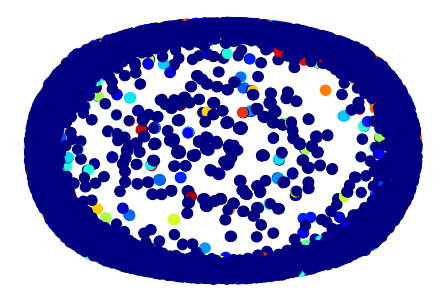

In [44]:
options = {
      'cmap'       : plt.get_cmap('jet'), 
      'node_color' : couleurs_num,
      'node_size'  : 100,
      'edge_color' : 'tab:grey',
      'with_labels': False
    }
plt.figure()
nx.draw(G_twitter,**options)
plt.show()